# Project: Classifying Wine Using XGBOOST Model.
This project now focuses on using the XGBoost model for classification of wine cultivars based on their chemical constituents, as required by the practice project guidelines.

**Model Selection**: XGBoost was chosen for this project because of its ability to handle structured datasets and its high performance in both classification and regression tasks. XGBoost utilizes the Gradient Boosting technique, which builds an ensemble of decision trees in an iterative manner, each one learning to correct the mistakes of the previous one. This approach helps minimize errors and optimize model performance. Specifically, XGBoost is highly effective for classification tasks, such as predicting wine cultivars based on features like alcohol content, acidity, and other chemical characteristics. The model also incorporates regularization techniques, which helps reduce overfitting and ensures robust predictions even in cases of high variance within the data. Due to its scalability, interpretability, and efficiency in handling large datasets with multiple features, XGBoost is an ideal choice for this task.

**Data Collection**: The dataset used in this project is from Kaggle, which contains 13 chemical features of wines from Italy and their corresponding cultivar types. 

## I. Data Loading and Understanding

In [503]:
# Import libraries
from scipy.io import arff
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score
import warnings

# Ignore warnings to keep the output clean
warnings.filterwarnings('ignore')

In [504]:
# Load the ARFF file
data, meta = arff.loadarff('dataset_191_wine.arff')

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows 
df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,b'1',14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,b'1',13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,b'1',13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,b'1',14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,b'1',13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [505]:
# Assess feature distributions, outliers, and scales
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [506]:
# Display DataFrame information, including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    object 
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    float64
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

## II. Data Preprocessing
Data preprocessing is a vital step that ensures the accuracy, completeness, and relevance of data for analysis or machine learning models. These tasks involve several key processes: 
### II.1. Data Cleaning
Data cleaning involves addressing issues like missing data, duplicates, and outliers, which can impact analysis or model training.
#### II.1.1) Handling missing data

In [507]:
# Find missing data
df.isna().sum()

class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64

**<span style="color:blue;">Observations:</span>** The DataFrame df does not have any missing data. If there are missing values, you can fill them with the mean using df['column_name'].fillna(df['column_name'].mean(), inplace=True), or fill them with the median using df['column_name'].fillna(df['column_name'].median(), inplace=True), or drop the rows with null values using df.dropna().

#### II.1.2) Handling duplicated data

In [508]:
# Find duplicated data
df.duplicated().sum()

0

**<span style="color:blue;">Observations:</span>** The DataFrame df does not have any duplicated data; otherwise, drop the duplicated rows using df.drop_duplicates().

#### II.1.3) Handling outliers

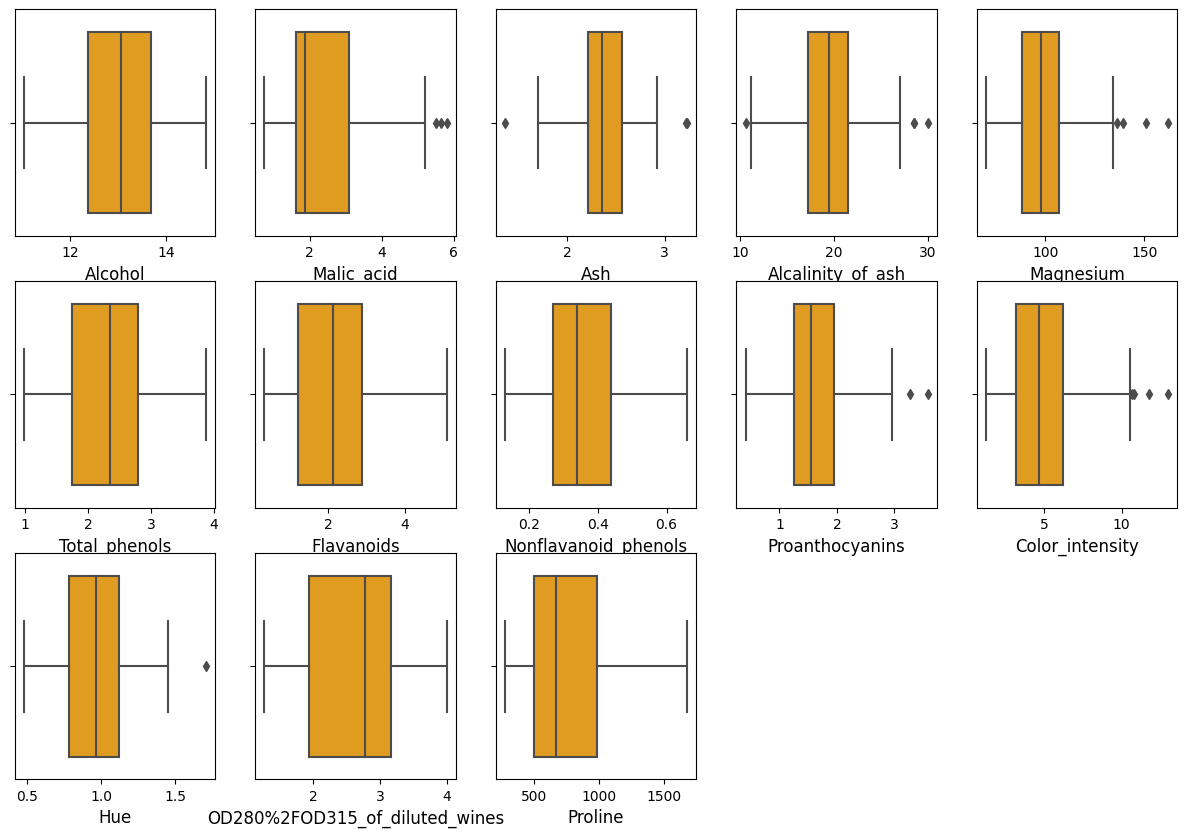

In [509]:
# Find the outliers using boxplot
plt.figure(figsize = (15, 10))
for i, col in enumerate(df.iloc[:, 1:14]):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data = df.iloc[:, 1:14], x = col , color = "orange")
    plt.xlabel(col, fontsize = 12)
    plt.xticks(fontsize = 10)

**<span style="color:blue;">Observations:</span>** The boxplot displays some unusual data points, marked by the small circles, in 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proanthocyanins', and 'Color_intensity'. These points are positioned more than 1.5 times the interquartile range (IQR) away from the quartiles, indicating they might be outliers.

In [510]:
# Function to remove outliers 
# Reference: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
# Reference: https://www.youtube.com/watch?v=A3gClkblXK8
def removeOutliers(df):
    
    for col in df.iloc[:, 1:14].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

# Remove outliers using function removeOutliers
df = removeOutliers(df)

# Check the updated df
df.shape

(161, 14)

#### II.1.4) Encoding categorical variables to numerical

In [511]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the target variable (wine types)
df['class'] = label_encoder.fit_transform(df['class'].astype(str))

# Check the encoded 'class' column
print(df['class'].unique())


[0 1 2]


### II.2. Handling class imbalances
Class imbalances occur when the distribution of values for the class is not uniform, potentially leading to biased model performance. Techniques such as oversampling, undersampling, or adjusting class weights are commonly used to address this imbalance. For this project, the 'oversampling' technique will be employed due to the small dataset size (only 161 rows).

In [512]:
# Check if there is class imbalance issue 
df['class'].value_counts()

1    61
0    57
2    43
Name: class, dtype: int64

In [513]:
# Handling the class imbalance issue
# Reference: https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/
# Create an oversampler using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

# Create features (X_imbalance) and target variable (y_imbalance)
X_imbalance = df.drop(columns=['class'])
y_imbalance = df['class']

# Oversample the minority class
X_over, y_over = oversample.fit_resample(X_imbalance, y_imbalance)
print("Oversampled class distribution 1:", Counter(y_over))

# Oversample the minority class
X_over2, y_over2 = oversample.fit_resample(X_over, y_over)
print("Oversampled class distribution 2:", Counter(y_over2))

Oversampled class distribution 1: Counter({1: 61, 2: 61, 0: 57})
Oversampled class distribution 2: Counter({0: 61, 1: 61, 2: 61})


In [514]:
# Get features after Feature Selection
X = X_over2
y = y_over2

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train= np.asarray(X_train)
y_train= np.asarray(y_train)
X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

# Print the size of training and test datasets
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 128 samples 
test set size: 55 samples


### II.3. Data Normalization:
Before building the model, it's essential to normalize the data since the unit of measurement might differ across features. This process ensures that all features contribute equally to the model. Here are the two steps involved:

- Step1: Visualize the distribution of each numerical column using a histogram to assess its normality. Look for a bell curve shape, which indicates a Gaussian distribution.

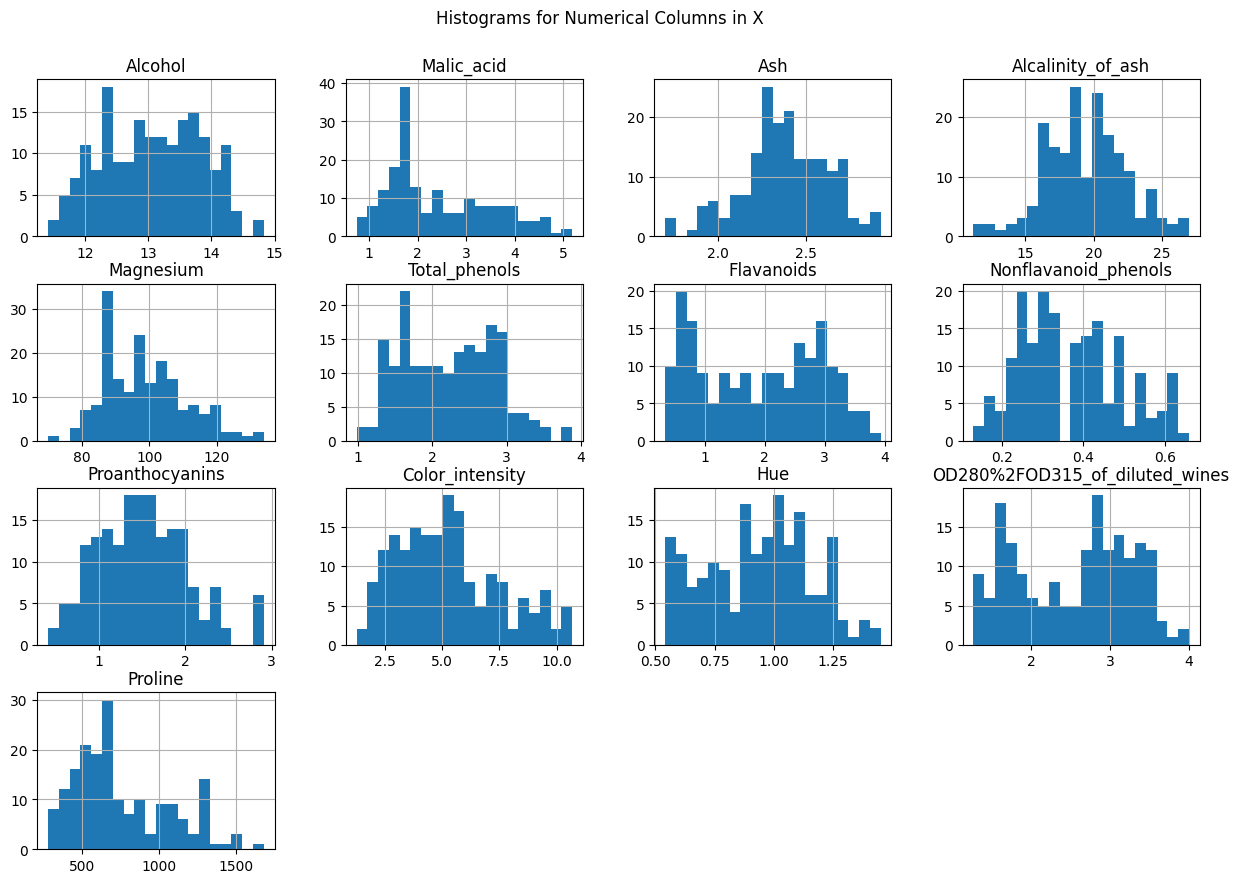

In [515]:
# Visualize the distribution of each numerical column in X
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

numeric_columns.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Columns in X', y=0.95)
plt.show()

- Step2 Normalize the features based on the observed distribution. Since all columes exhibit non-Gaussian distributions, Min-Max Normalization will be applied to these columns

In [516]:
# Normalize the dataset
scaler= MinMaxScaler().fit(X_train) # the scaler is fitted to the training set
normalized_X_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_X_test= scaler.transform(X_test) # the scaler is applied to the test set
print('X train before Normalization')
print(X_train[0:2])
print('\nX train after Normalization')
print(normalized_X_train[0:2])

X train before Normalization
[[1.323e+01 3.300e+00 2.280e+00 1.850e+01 9.800e+01 1.800e+00 8.300e-01
  6.100e-01 1.870e+00 1.052e+01 5.600e-01 1.510e+00 6.750e+02]
 [1.220e+01 3.030e+00 2.320e+00 1.900e+01 9.600e+01 1.250e+00 4.900e-01
  4.000e-01 7.300e-01 5.500e+00 6.600e-01 1.830e+00 5.100e+02]]

X train after Normalization
[[0.53216374 0.5752809  0.4957265  0.46202532 0.4375     0.20912548
  0.10404624 0.95918367 0.584      0.98297872 0.02197802 0.08791209
  0.2831669 ]
 [0.23099415 0.51460674 0.52991453 0.49367089 0.40625    0.
  0.00578035 0.53061224 0.128      0.44893617 0.13186813 0.20512821
  0.16547789]]


## III. Model Building

### III.1. XGBoost Model Building

In [517]:
# Build an XGBoost model
xgboost_model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)

# Train the model on the normalized training data
xgboost_model.fit(normalized_X_train, y_train)

# Evaluate the model using cross-validation with accuracy as the scoring metric
scores = cross_val_score(xgboost_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Output the results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.96153846 0.96153846 0.96153846 0.92       1.        ]
Mean Accuracy: 0.9609


### III.2. Hyperparameter Tuning using Bayes Optimization

In [518]:
# Define the parameter search space
param_space = {
    'learning_rate': (0.01, 0.2, 'uniform'),
    'max_depth': (3, 10),
    'n_estimators': (50, 500),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

# Perform Bayes Optimization
opt = BayesSearchCV(xgboost_model, param_space, n_iter=32, cv=5, random_state=42)
opt.fit(normalized_X_train, y_train)

# Display the best parameters found by Bayes Optimization
print("Best Hyperparameters found: ", opt.best_params_)


Best Hyperparameters found:  OrderedDict([('colsample_bytree', 0.9777389931549642), ('learning_rate', 0.14311807447805955), ('max_depth', 9), ('n_estimators', 237), ('subsample', 0.6905323823987464)])


### III.3. Model Validation using Cross-Validation
Validate the model using cross-validation with the best hyperparameters from Bayes Optimization:

In [519]:
# Perform cross-validation with the best hyperparameters
best_model = opt.best_estimator_
scores_best = cross_val_score(best_model, normalized_X_train, y_train, cv=5)

# Output the results
print(f"Cross-Validation Accuracy Scores: {scores_best}")
print(f"Mean Accuracy: {scores_best.mean():.4f}")

Cross-Validation Accuracy Scores: [1.         0.96153846 1.         0.96       1.        ]
Mean Accuracy: 0.9843


### III.4. Train the Model using Best Hyperparameters

In [520]:
# Train the model using the best hyperparameters
best_model.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9777389931549642, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14311807447805955,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=237, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

## IV. Evaluation
### IV.1. Prediction and Final Metric Calculation
Predict on the test set and calculate the final metrics:

In [521]:
# Predict the test set results
y_pred = best_model.predict(normalized_X_test)

# Calculate the final accuracy score and confusion matrix
final_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Final Accuracy: ", final_accuracy)
print("Confusion Matrix: \n", conf_matrix)

Final Accuracy:  0.9818181818181818
Confusion Matrix: 
 [[20  0  0]
 [ 0 17  1]
 [ 0  0 17]]


### IV.2. Comparison of Cross-Validation and Final Metric
Finally, compare the cross-validation score and the final metric calculated on the test set:

In [522]:
# Compare the cross-validation score with the final accuracy score
cv_score = cross_val_score(best_model, normalized_X_train, y_train, cv=5).mean()
print(f"Cross-validation score: {cv_score:.4f}")
print(f"Final Accuracy score: {final_accuracy:.4f}")

Cross-validation score: 0.9843
Final Accuracy score: 0.9818
